## "Presentación intermedia"

Julieta Zambrano A01365637

## Lo primero es importar las librerías a utilizar 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn import linear_model

## Se descarga la base de datos a utilizar 

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('Libro2.xlsx',
                   engine = 'openpyxl'
                  )
df

,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_365,calculated_host_listings_count,reviews_per_month
0,Roma Norte,Apartment,Entire home/apt,5,2.0,2,3,Real Bed,3503,3,338,3,2.77
1,Centro HistÃ³rico,Apartment,Entire home/apt,5,2.0,2,2,Real Bed,3923,3,61,3,2.64
2,Polanco,Apartment,Entire home/apt,2,1.5,1,1,Real Bed,500,3,0,3,0.12
3,Polanco,Apartment,Entire home/apt,5,2.5,3,3,Real Bed,3600,3,0,3,0.05
4,Polanco,Apartment,Private room,1,0.0,1,1,Real Bed,401,3,365,2,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Roma Norte,Loft,Entire home/apt,2,1.5,1,1,Real Bed,909,2,80,1,3.64
196,Zona Rosa,Loft,Entire home/apt,2,1.5,1,1,Real Bed,1500,2,0,1,0.70
197,Roma Norte,Loft,Private room,2,1.5,1,1,Real Bed,498,1,365,2,3.10
198,Centro HistÃ³rico,Loft,Private room,2,2.0,1,1,Real Bed,542,1,364,1,1.03


Escogí una base de datos de Airbnb en donde vienen datos de departamentos, casas, hoteles y loft que se pueden rentar en la Ciudad de México. 

## Se obtiene la información de la base de datos 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   200 non-null    object 
 1   property_type                   200 non-null    object 
 2   room_type                       200 non-null    object 
 3   accommodates                    200 non-null    int64  
 4   bathrooms                       200 non-null    float64
 5   bedrooms                        200 non-null    int64  
 6   beds                            200 non-null    int64  
 7   bed_type                        200 non-null    object 
 8   price                           200 non-null    int64  
 9   minimum_nights                  200 non-null    int64  
 10  availability_365                200 non-null    int64  
 11  calculated_host_listings_count  200 non-null    int64  
 12  reviews_per_month               200 

La base de datos cuenta con 200 registros y 13 columnas, de las cuales 2 son float, 7 son int  y 4 son object. Es muy importante analizar y saber el tipo de variables con las que se cuenta para poder realizar con exito el análisis de regresión. 

## Variable de interés 

Al analizar la base de datos decidí que la variable de interés sera price (describe el precio de un Airbnb por noche), ya que con este proyecto se espera diseñar un modelo de regresión simple en el que se pueda ingresar los datos de un Airbnb y pronosticar su precio por noche. 

## Analizamos la media, la desviación estandar y los percentiles de las columnas numéricas. 

In [5]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,calculated_host_listings_count,reviews_per_month
count,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,3.210000,1.627500,1.52000,1.745000,2080.75000,6.200000,228.225000,5.445000,1.234250
std,2.313582,0.856541,1.19446,1.445831,2098.45721,11.887242,138.435277,7.152817,1.324609
min,1.000000,0.000000,0.00000,0.000000,181.00000,1.000000,0.000000,1.000000,0.020000
25%,2.000000,1.000000,1.00000,1.000000,499.50000,2.000000,90.000000,2.000000,0.340000
50%,2.000000,1.500000,1.00000,1.000000,1500.00000,3.000000,270.000000,3.000000,0.705000
75%,4.000000,2.000000,2.00000,2.000000,2974.00000,4.250000,364.000000,6.000000,1.785000
max,15.000000,6.500000,7.00000,11.000000,13294.00000,120.000000,365.000000,41.000000,8.360000


## Buscamos la variable de mayor correlación con la variable de interés (price)

In [6]:
variables = ['neighbourhood', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'minimum_nights',
       'availability_365', 'calculated_host_listings_count',
       'reviews_per_month']
df = df[variables].dropna() 
df[variables].corr()

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,calculated_host_listings_count,reviews_per_month
accommodates,1.000000,0.752231,0.749474,0.905426,0.972455,-0.041367,-0.063174,0.037748,0.080005
bathrooms,0.752231,1.000000,0.649517,0.724312,0.704977,0.019199,0.045865,-0.018330,0.039714
bedrooms,0.749474,0.649517,1.000000,0.772601,0.724498,-0.013732,-0.098171,-0.028397,-0.091254
beds,0.905426,0.724312,0.772601,1.000000,0.891613,-0.048477,-0.072194,0.011999,0.013609
price,0.972455,0.704977,0.724498,0.891613,1.000000,-0.050461,-0.076643,0.033813,0.056343
minimum_nights,-0.041367,0.019199,-0.013732,-0.048477,-0.050461,1.000000,-0.029501,0.045874,-0.087386
availability_365,-0.063174,0.045865,-0.098171,-0.072194,-0.076643,-0.029501,1.000000,-0.050373,0.049519
calculated_host_listings_count,0.037748,-0.018330,-0.028397,0.011999,0.033813,0.045874,-0.050373,1.000000,0.168840
reviews_per_month,0.080005,0.039714,-0.091254,0.013609,0.056343,-0.087386,0.049519,0.168840,1.000000


En este caso la variable con mayor correlación con la variable de interés es accommodates (número de personas que caben en el Airbnb). 

## Verificamos cómo es la correlación existente entre la variable independiente 'accommodates' y la variable dependiente 'price'

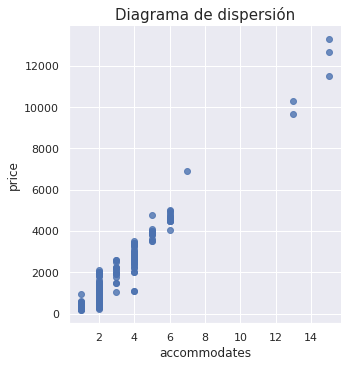

In [7]:
sns.lmplot(x = 'accommodates', y = 'price', data = df,fit_reg = False) 
plt.title('Diagrama de dispersión', fontsize = 15) 
plt.show()

En el diagrama de dispersión se puede ver que cuando la variable accommodates aumenta el precio del airbnb también aumenta esto quiere decir que se tiene una correlación positiva. 

## Se analizaron las variables 'accommodates' y 'price' a través de histogramas y boxplots

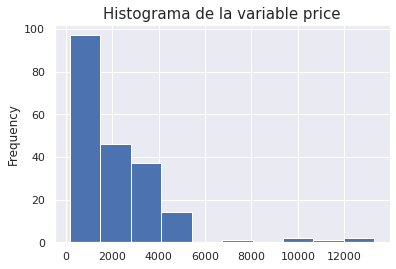

In [8]:
df['price'].plot(kind = 'hist')
plt.title('Histograma de la variable price', fontsize = 15) 
plt.show()

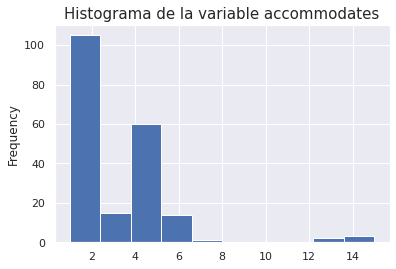

In [9]:
df['accommodates'].plot(kind = 'hist')
plt.title('Histograma de la variable accommodates', fontsize = 15) 
plt.show()

Text(0.5, 1.0, 'Datos atípicos de price')

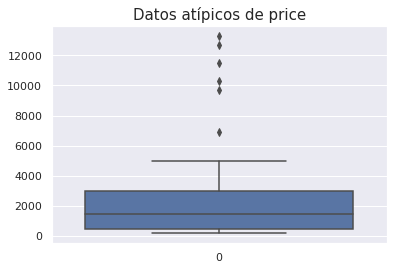

In [10]:
sns.boxplot(data = df.loc[:,'price'])
plt.title('Datos atípicos de price', fontsize = 15) 

Text(0.5, 1.0, 'Datos atípicos de accommodates')

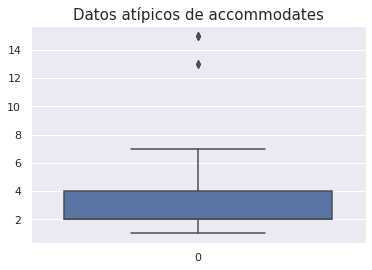

In [11]:
sns.boxplot(data = df.loc[:,'accommodates'])
plt.title('Datos atípicos de accommodates', fontsize = 15) 

En el histograma de la varibale price podemos ver que la mayoría de los datos están entre lo valores de 0 y 1,000 y en el histograma de accommodates se puede ver que la mayoría de los datos están entre 0 y 2. 

Por último, como podemos ver en los dos boxplots tanto la variable price como la variable accommodates tienen datos atípicos, estos datos fueron checados y se determinó que no se borrarían ya que no considere que estuvieran incorrectos.  